# Introduction
Hello, I continue to improve myself in Deep Learning from where I left off. In this project, I will apply the CNN model that I created with Keras to the data set. I will try to estimate with CNN the number of pictures from zero to nine in sign language. This project is my second project about the Convolutional Neural Network(CNN) model and my fifth project about Deep Learning. I will share my previous work in this section. In this learning path, I would be very happy if you would examine my notebook and help me with how to improve my notebook or what I should do in this development path. I wish you a good day and good work.

[For a detailed description of the dataset, please click here](https://www.kaggle.com/datasets/ardamavi/sign-language-digits-dataset)

My projects about Deep Learning:<br>
- [Gender Prediction With Logistic Regression](https://www.kaggle.com/code/ihsncnkz/gender-prediction-with-logistic-regression)
- [Cat And Dog Prediction With ANN](https://www.kaggle.com/code/ihsncnkz/cat-and-dog-prediction-with-ann)
- [Linear Regression With Pytorch](https://www.kaggle.com/code/ihsncnkz/linear-regression-with-pytorch)
- [My First Convolutional Neural Network(CNN) Work](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)

My projects about Data Science and Machine Learning:
- [GPU Search](https://www.kaggle.com/code/ihsncnkz/gpu-search)
- [EDA And Linear Regression](https://www.kaggle.com/code/ihsncnkz/eda-and-linear-regression)
- [Regression Models](https://www.kaggle.com/code/ihsncnkz/regression-models)
- [Logistic Regression](https://www.kaggle.com/code/ihsncnkz/logistic-regression)
- [Classification With K-Nearest Neighbors(KNN)](https://www.kaggle.com/code/ihsncnkz/classification-with-k-nearest-neighbors-knn)
- [Classification With Support Vector Machine(SVM)](https://www.kaggle.com/code/ihsncnkz/classification-with-support-vector-machine-svm)
- [Classification With Naive Bayes Classification](https://www.kaggle.com/code/ihsncnkz/classification-with-naive-bayes-classification)
- [Decision Tree And Random Forest Classifier Models](https://www.kaggle.com/code/ihsncnkz/decision-tree-and-random-forest-classifier-models)
- [K-Means And Hierarchical Clustering With 3D Plotly](https://www.kaggle.com/code/ihsncnkz/k-means-and-hierarchical-clustering-with-3d-plotly)
- [Natural Language Process(NLP) With Naive Bayes](https://www.kaggle.com/code/ihsncnkz/natural-language-process-nlp-with-naive-bayes)
- [Recommendation System With KNN](https://www.kaggle.com/code/ihsncnkz/recommendation-system-with-knn)

# Content <a id = "cont"></a>
- [Data Review](#1)
- [Data Preparing](#2)
    - [Train Test Split](#dp1)
- [Convolutional Neural Network(CNN)](#3)
    - [Implementing With Keras](#cnn1)
    - [Data Augmentation](#cnn2)
    - [Fit The Model](#cnn3)
    - [Evaluate The Model](#cnn4)
- [CONCLUSION](#4)

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/X.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/Y.npy
/kaggle/input/sign-language-digits-dataset/Sign-language-digits-dataset/X.npy


# Data Review <a id = "1"></a>
[Go Content](#cont) <br>

In this chapter, I will review the dataset.

I read the dataset with the pandas library.

In [2]:
x_data = np.load("/kaggle/input/sign-language-digits-dataset/X.npy")
y_data = np.load("/kaggle/input/sign-language-digits-dataset/Y.npy")

In [3]:
x_data[0]

array([[0.46666667, 0.4745098 , 0.47843137, ..., 0.5176471 , 0.5137255 ,
        0.5019608 ],
       [0.49803922, 0.4862745 , 0.4862745 , ..., 0.5254902 , 0.5176471 ,
        0.50980395],
       [0.54509807, 0.49411765, 0.49019608, ..., 0.5294118 , 0.5254902 ,
        0.5137255 ],
       ...,
       [0.5019608 , 0.5137255 , 0.5176471 , ..., 0.5529412 , 0.54509807,
        0.53333336],
       [0.49803922, 0.5058824 , 0.5137255 , ..., 0.54509807, 0.53333336,
        0.52156866],
       [0.49019608, 0.49803922, 0.5019608 , ..., 0.5294118 , 0.52156866,
        0.50980395]], dtype=float32)

In [4]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

I visualize an image inside of x_data.

(-0.5, 63.5, 63.5, -0.5)

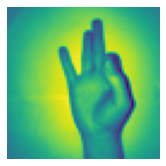

In [5]:
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_data[45].reshape(img_size, img_size))
plt.axis("off")

# Data Preparing <a id="2"></a>
[Go Content](#cont) <br>

In this chapter, I will prepare the dataset for the CNN model with Keras.

I change the shape of x_data. 

In [6]:
X_train = x_data.reshape(-1,64,64,1)
print("x_train shape: ", X_train.shape)

x_train shape:  (2062, 64, 64, 1)


In this chapter, I classify them according to the number of pictures in the data set.
- 204-409 => 0
- 822-1028 => 1
- 1649-1855 => 2
- 1443-1649 => 3
- 1236-1443 => 4
- 1855-2062 => 5
- 615-822 => 6
- 409-615 => 7
- 1028-1236 => 8
- 0-204 => 9

In [7]:
X_classification = np.concatenate((X_train[204:409,:],
                                   X_train[822:1028,:],
                                   X_train[1649:1855,:],
                                   X_train[1443:1649,:],
                                   X_train[1236:1443,:],
                                   X_train[1855:2062,:],
                                   X_train[615:822,:],
                                   X_train[409:615,:],
                                   X_train[1028:1236,:],
                                   X_train[0:204,:]),axis = 0)

## Train Test Split <a id = "dp1"></a>
[Go Content](#cont) <br>

I constitute train and test datasets from X_classification and y_data.

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_classification, y_data, test_size = 0.1, random_state = 42)

print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (1855, 64, 64, 1)
x_test shape (207, 64, 64, 1)
y_train shape (1855, 10)
y_test shape (207, 10)


I visualize an image inside of x_train.

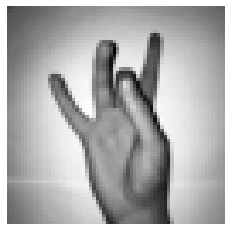

In [9]:
plt.imshow(x_train[2][:,:,0], cmap = "gray")
plt.axis("off")
plt.show()

# Convolutional Neural Network(CNN) <a id ="3"></a>
[Go Content](#cont) <br>

In this chapter, I will constitute the CNN model with Keras. I will train with the CNN model using the train and test datasets. I will evaluate the train of results and I will visualize it. I gave brief information about the CNN model in my previous work and [You can go to my work by clicking here.](https://www.kaggle.com/code/ihsncnkz/my-first-convolutional-neural-network-cnn-work)

## Implementing With Keras <a id = "cnn1"></a>
[Go Content](#cont) <br>

In this chapter, I constitute the CNN model with Keras. I gave brief information about the Keras in my previous work and I left the link to my work in the above statement, You can see information about Keras.

In [10]:
# import Library
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Create Model
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (64,64,1)))
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

# Define Optimizer
optimizer = Adam(learning_rate = 0.0001, beta_1=0.9, beta_2=0.999)

# Compile Model
model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ["accuracy"])

# Epochs And Batch Size
epochs = 100

2022-08-31 16:12:18.570014: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

## Data Augmentation <a id = "cnn2"></a>
[Go Content](#cont) <br>

In this chapter, I widen the x_train dataset with new data. I constitute new image data.

In [12]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

## Fit The Model <a id = "cnn3"></a>
[Go Content](#cont) 

In [13]:
history = model.fit(datagen.flow(x_train, y_train), epochs = epochs, validation_data = (x_test, y_test))

2022-08-31 16:12:18.901563: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
58/58 [==============================] - 5s 65ms/step - loss: 2.3084 - accuracy: 0.0916 - val_loss: 2.3047 - val_accuracy: 0.0821
Epoch 2/100
58/58 [==============================] - 3s 53ms/step - loss: 2.3048 - accuracy: 0.1030 - val_loss: 2.3034 - val_accuracy: 0.0821
Epoch 3/100
58/58 [==============================] - 3s 53ms/step - loss: 2.3038 - accuracy: 0.1035 - val_loss: 2.3033 - val_accuracy: 0.0821
Epoch 4/100
58/58 [==============================] - 3s 54ms/step - loss: 2.3030 - accuracy: 0.1100 - val_loss: 2.3035 - val_accuracy: 0.1256
Epoch 5/100
58/58 [==============================] - 3s 54ms/step - loss: 2.3017 - accuracy: 0.1100 - val_loss: 2.3034 - val_accuracy: 0.1353
Epoch 6/100
58/58 [==============================] - 3s 54ms/step - loss: 2.3009 - accuracy: 0.1089 - val_loss: 2.3017 - val_accuracy: 0.0628
Epoch 7/100
58/58 [==============================] - 4s 62ms/step - loss: 2.3014 - accuracy: 0.1057 - val_loss: 2.3022 - val_accuracy: 0.0821
Epoch 

## Evaluate The Model <a id = "cnn4"></a>
[Go Content](#cont) <br>

I visualize the results of training.

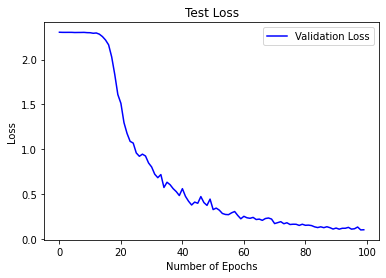

In [14]:
plt.plot(history.history["val_loss"], color = "b", label = "Validation Loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

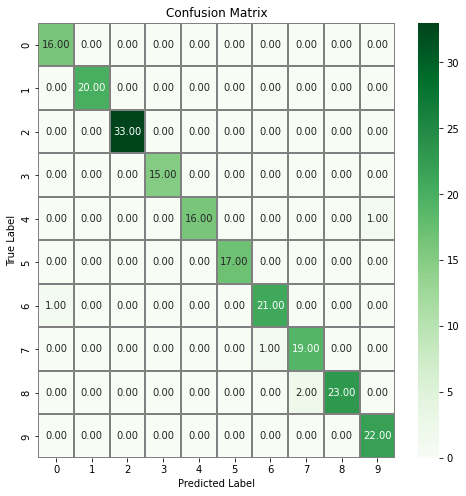

In [15]:
# confusion matrix
# Predict the value from the validation dataset
Y_pred = model.predict(x_test)
# Convert Predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert Validation observation to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# Compute the confision matrix
condision_mtrx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(condision_mtrx, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".2f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

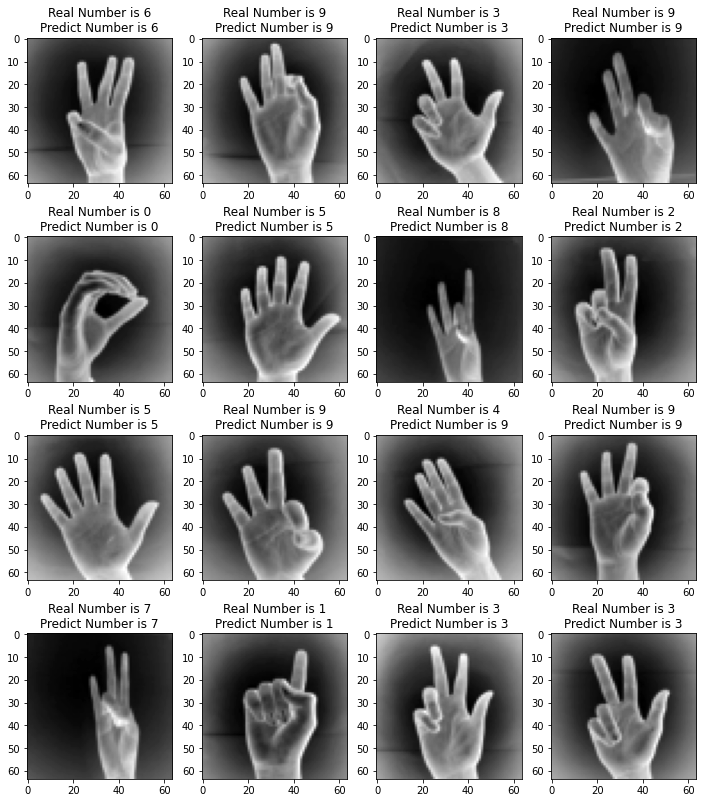

In [16]:
x_val_test =  x_test.reshape(x_test.shape[0], 64, 64)

fig , axis = plt.subplots(4, 4, figsize = (12, 14))

for i, ax in enumerate(axis.flat):
    ax.imshow(x_val_test[i], cmap = 'binary')
    ax.set(title = f"Real Number is {y_test[i].argmax()}\nPredict Number is {Y_pred[i].argmax()}");

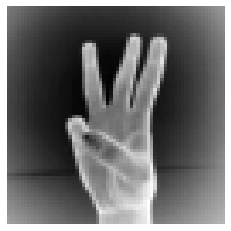

Previsto : [6 9 3 9 0 5 8 2 5 9 9 9 7 1 3 3 0 5 0 7 0 8 3 6 9 2 7 3 5 9 8 5 4 6 4 0 3
 1 9 2 7 7 3 1 1 2 0 7 8 9 1 9 6 2 1 0 6 8 2 8 8 7 2 7 5 9 2 3 6 4 1 1 5 7
 4 9 9 4 3 7 8 9 2 0 9 0 0 4 1 5 5 4 7 4 7 4 2 2 8 7 2 0 9 0 2 1 7 8 8 7 2
 8 3 3 2 2 6 1 5 5 5 0 1 5 8 2 6 5 1 0 3 1 9 9 8 3 8 9 2 2 2 6 2 6 6 1 6 2
 5 4 9 2 1 2 6 2 6 6 1 1 7 5 9 8 6 2 4 6 6 9 8 7 2 9 1 6 7 6 0 6 1 7 4 8 4
 3 2 2 4 2 8 6 8 3 2 0 8 7 8 5 4 7 0 8 2 4 2]
   ImageId  Label
0        1      6
1        2      9
2        3      3
3        4      9
4        5      0
5        6      5
6        7      8
7        8      2
8        9      5
9       10      9


In [17]:
y_pred_test = model.predict(x_test)
y_pred_test = np.argmax(y_pred_test,axis=1)

i = 0
plt.imshow(x_test[i].reshape(64,64), cmap = plt.cm.binary)
plt.axis("off")
plt.show()
print('Previsto : {}'.format(y_pred_test))

result = pd.Series(y_pred_test, name = "Label")
submission = pd.concat([pd.Series(range(1, len(y_pred_test)+1), name = "ImageId"), result], axis = 1)
print(submission.head(10))
submission.to_csv("mlp_mnist_v1.csv", index = False)

# CONCLUSION <a id = "4"></a>
****
[Go Content](#cont) <br>
I am learning the English language newly if I make an errata please advise me in the comment. Thank you for reading my notebook, your votes and your comments. I will be waiting for your advice.